In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#import world happiness report, data from United Nations World Happiness Report
healthy_life = pd.read_csv("../Data/Healthy Life.csv")

In [3]:
healthy_life.columns

Index(['country', 'Region indicator', 'Life ladder, 2015-2017',
       'Standard error, life ladder, 2015-2017',
       'Log of GDP per person, 2015-2017', 'GDP per person, 2015-2017',
       'Healthy life expectancy, 2015-2017', 'Social support, 2015-2017',
       'Standard error, social support, 2015-2017',
       'Freedom to make life choices, 2015-2017',
       'Standard error, freedom to make life choices, 2015-2017',
       'Generosity, 2015-2017, without adjustment for GDP per person',
       'Standard error, generosity, 2015-2017',
       'Perceptions of corruption, 2015-2017',
       'Standard error, perceptions of corruption, 2015-2017'],
      dtype='object')

In [13]:
#rename columns, remove columns not related to healthy life
healthy_life = healthy_life.rename(columns={"Life ladder, 2015-2017" : "Happiness Score",
                                            "Healthy life expectancy, 2015-2017" : "Healthy Life Expectancy",
                                            "Region indicator" : "Region", "country":"Country"})
healthy_life_clean = healthy_life[["Country", "Region", "Happiness Score", "Healthy Life Expectancy"]]
healthy_life_clean.head(5)

,Country,Region,Happiness Score,Healthy Life Expectancy
0,Afghanistan,South Asia,3.631519,52.013329
1,Albania,Central and Eastern Europe,4.586040,68.871552
2,Algeria,Middle East and North Africa,5.294638,65.604858
3,Angola,Sub-Saharan Africa,3.794838,52.460709
4,Argentina,Latin America and Caribbean,6.387958,67.398483


In [ ]:
healthy_life_clean.to_csv("../Data/healthy_life_clean.csv")

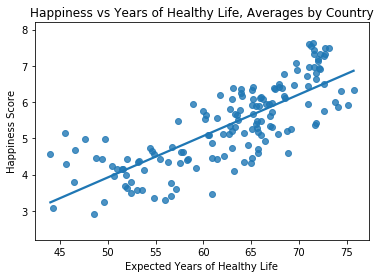

In [5]:
#create scatter plot with best fit line, save figure
sns.regplot(x='Healthy Life Expectancy', y="Happiness Score", data=healthy_life_clean, ci=False, truncate=True)
plt.ylim(2.2, 8.2)
plt.xlabel("Expected Years of Healthy Life")
plt.title("Happiness vs Years of Healthy Life, Averages by Country")
plt.savefig("../Graphs/HealthyHappinessLinear.png")

There is a positive correlation between healthy life expectancy and happiness. As life expectancy increases, happiness increases. Correlation calculation below:

\begin{equation*}
\sigma_{xy} = \frac{\sum x_i y_i - n \bar x\bar y}{\sqrt{\sum x_i^2 - n \bar x^2} \sqrt{\sum y_i^2 - n \bar y^2}}
\end{equation*}

In [6]:
#Calculate correlation coefficient

healthy_life["Happiness Score"].corr(healthy_life["Healthy Life Expectancy"])

0.7862507529360528

From this graph, there seems to be three clusters, centered around *x* values of 52, 65, and 72. We can examine these clusters for similarities.

Text(0.5,1,'Happiness vs Years of Healthy Life')

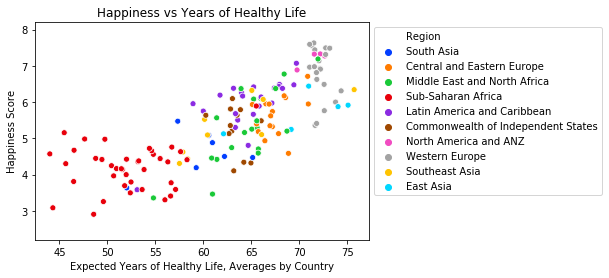

In [14]:
#Categorize Region, add color by region to scatter plot. Save figure
sns.set_palette("bright")
ax = sns.scatterplot(x="Healthy Life Expectancy", y="Happiness Score", 
                 hue="Region", data=healthy_life_clean)
plt.legend(bbox_to_anchor= (1, 1))
plt.ylim(2.2, 8.2)
plt.xlabel("Expected Years of Healthy Life, Averages by Country")
plt.title("Happiness vs Years of Healthy Life")

plt.savefig("../Graphs/HealthyHappinessRegion.png", bbox_inches='tight')

After color-coding the countries by region, countries that are in the same geograhical location are closer to each other in expected healthy life and happiness than they are to countries in other regions. Western European, North American/AUS/NZ countries are the most happy and have the highest healthy life expectancy, while sub-Saharan African countries are the least happy and have the lowest healthy life expectancy. The rest of the nations fall somewhere between the two extremes.

This graph suggests that happiness is correlated with region, and perhaps one way for sub-Saharan Africans to improve happiness is to move anywhere else. This is in fact supported by data from the same UN report that broke out the happiness scores for immigrants and native-born people, and found that the happiness scores for the two groups were very similar.